# Seaborn
 - Built-in themes plot styling
 - Beautiful color palletes
 - Functions to visualize univariate and bivariate distributions
 - Visualize regressions

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = pd.read_csv('Iris.csv', index_col = 0)
cancer = pd.read_csv('breast-cancer.csv')

In [3]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


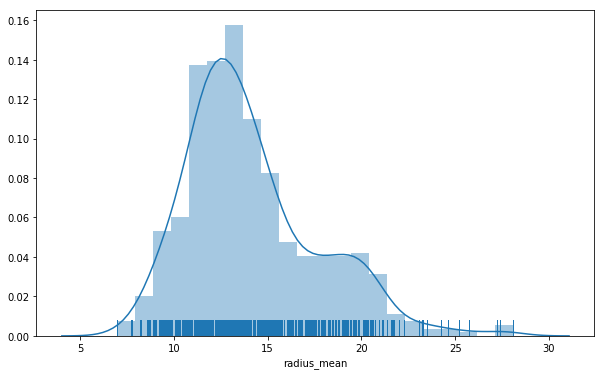

In [5]:
# plot a histogram for the distribution of the tumor radius
plt.figure(figsize = (10, 6))
sns.distplot(cancer.radius_mean, rug = True)

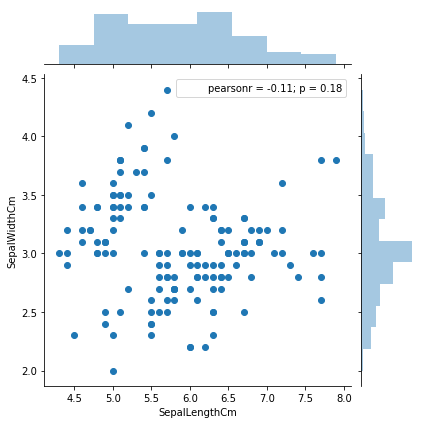

In [6]:
# Scatter plots
# Plot a joint plot between iris species sepal length an dwidth
sns.jointplot(iris.SepalLengthCm, iris.SepalWidthCm, data = iris)

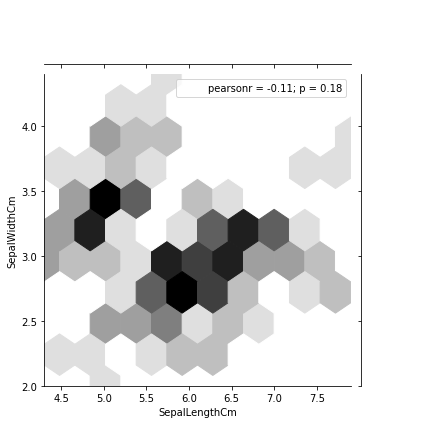

In [7]:
# Hexbin plots
sns.jointplot(iris.SepalLengthCm, iris.SepalWidthCm, data = iris, kind = 'hex', color = 'w')

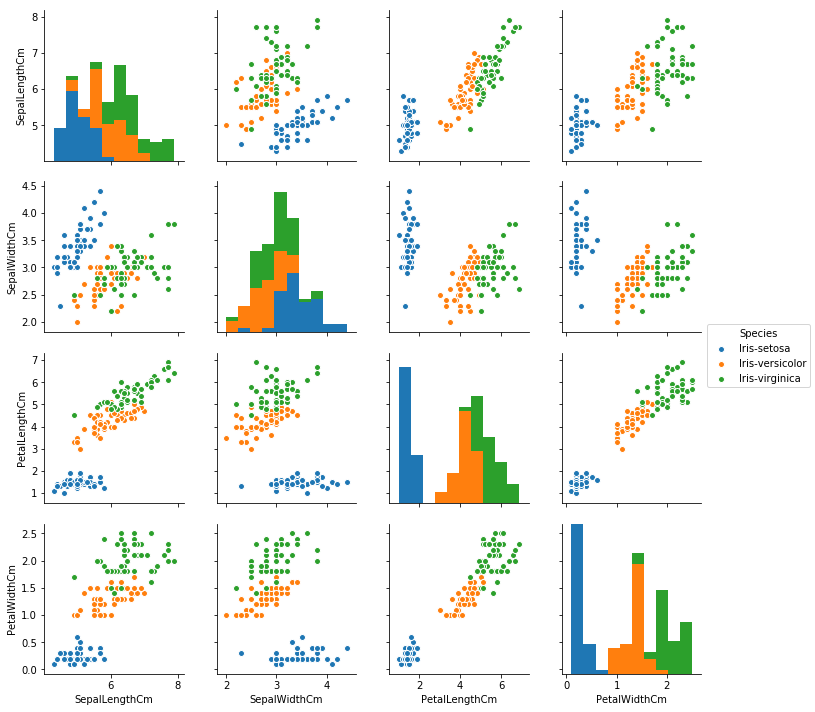

In [8]:
# Visualize pairwise relationship
sns.pairplot(iris, hue = 'Species')

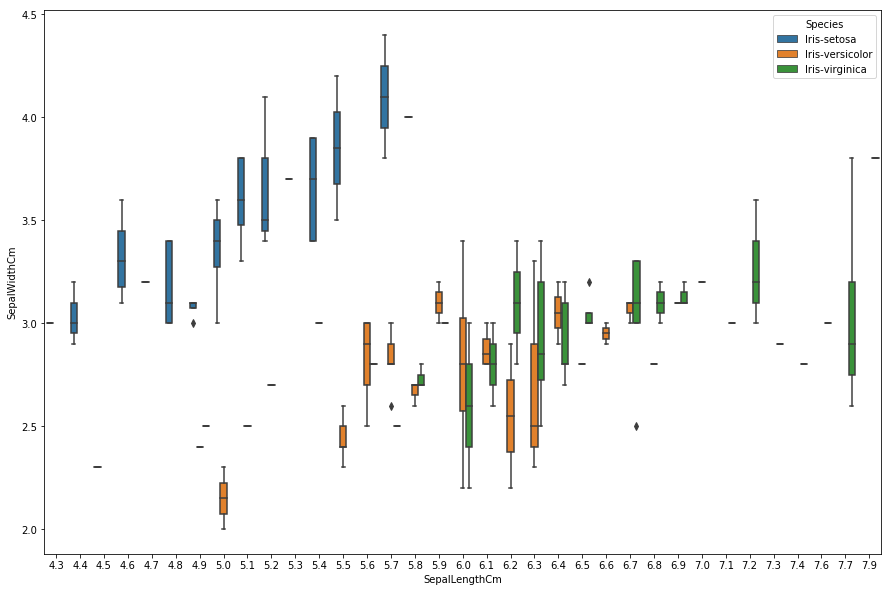

In [9]:
# box plots for each category of iris species
plt.figure(figsize = (15, 10)) # set a large figure for easy manipulation
sns.boxplot(iris.SepalLengthCm, iris.SepalWidthCm, data = iris, hue = 'Species')

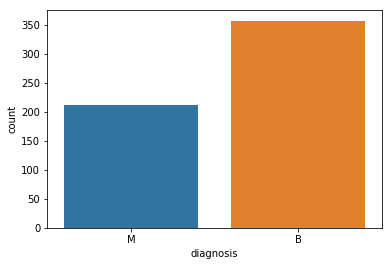

In [10]:
# breast cancer countplot for Malignant or Benign tumor
sns.countplot(cancer.diagnosis)

In [11]:
# Heatmap for correlation between features
cancer_mean_features = pd.DataFrame(cancer.iloc[:, 1:11])
cancer_mean_features.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


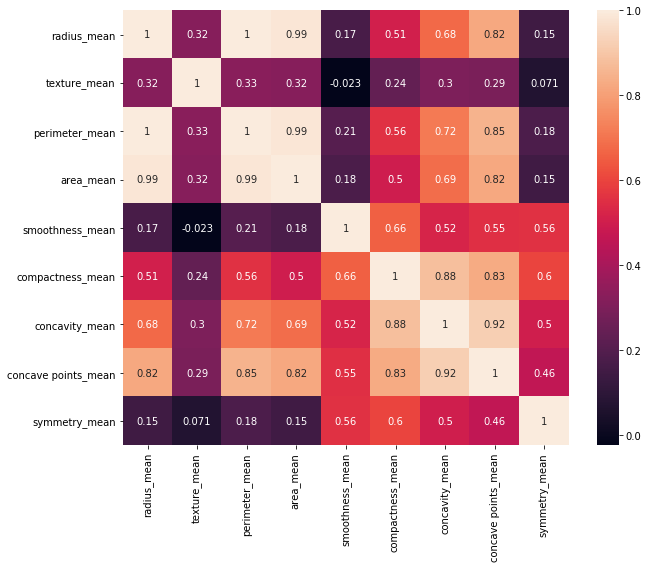

In [12]:
corr = cancer_mean_features.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True)

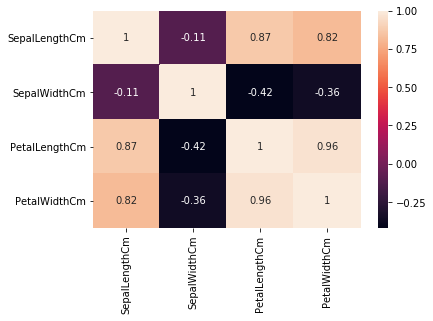

In [13]:
# Heatmap for iris data
corr_2 = iris.corr(method = 'pearson')
sns.heatmap(corr_2, annot = True)

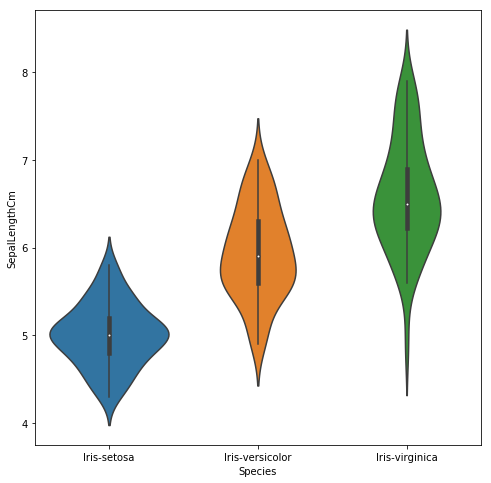

In [15]:
# Violin Plot
plt.figure(figsize=(8, 8))
sns.violinplot(x="Species", y="SepalLengthCm", data=iris)

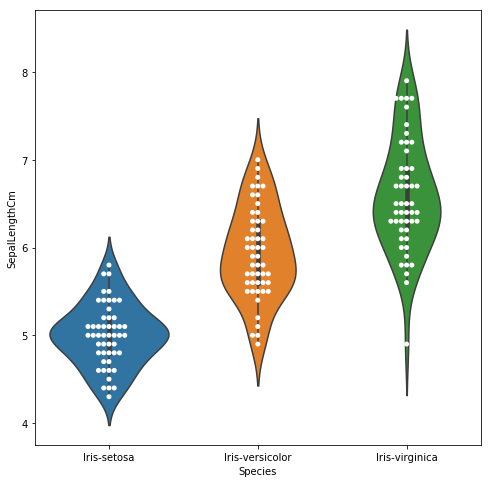

In [16]:
plt.figure(figsize=(8, 8))
sns.violinplot(x="Species", y="SepalLengthCm", data=iris)
sns.swarmplot(x="Species", y="SepalLengthCm", data=iris, color = 'w')

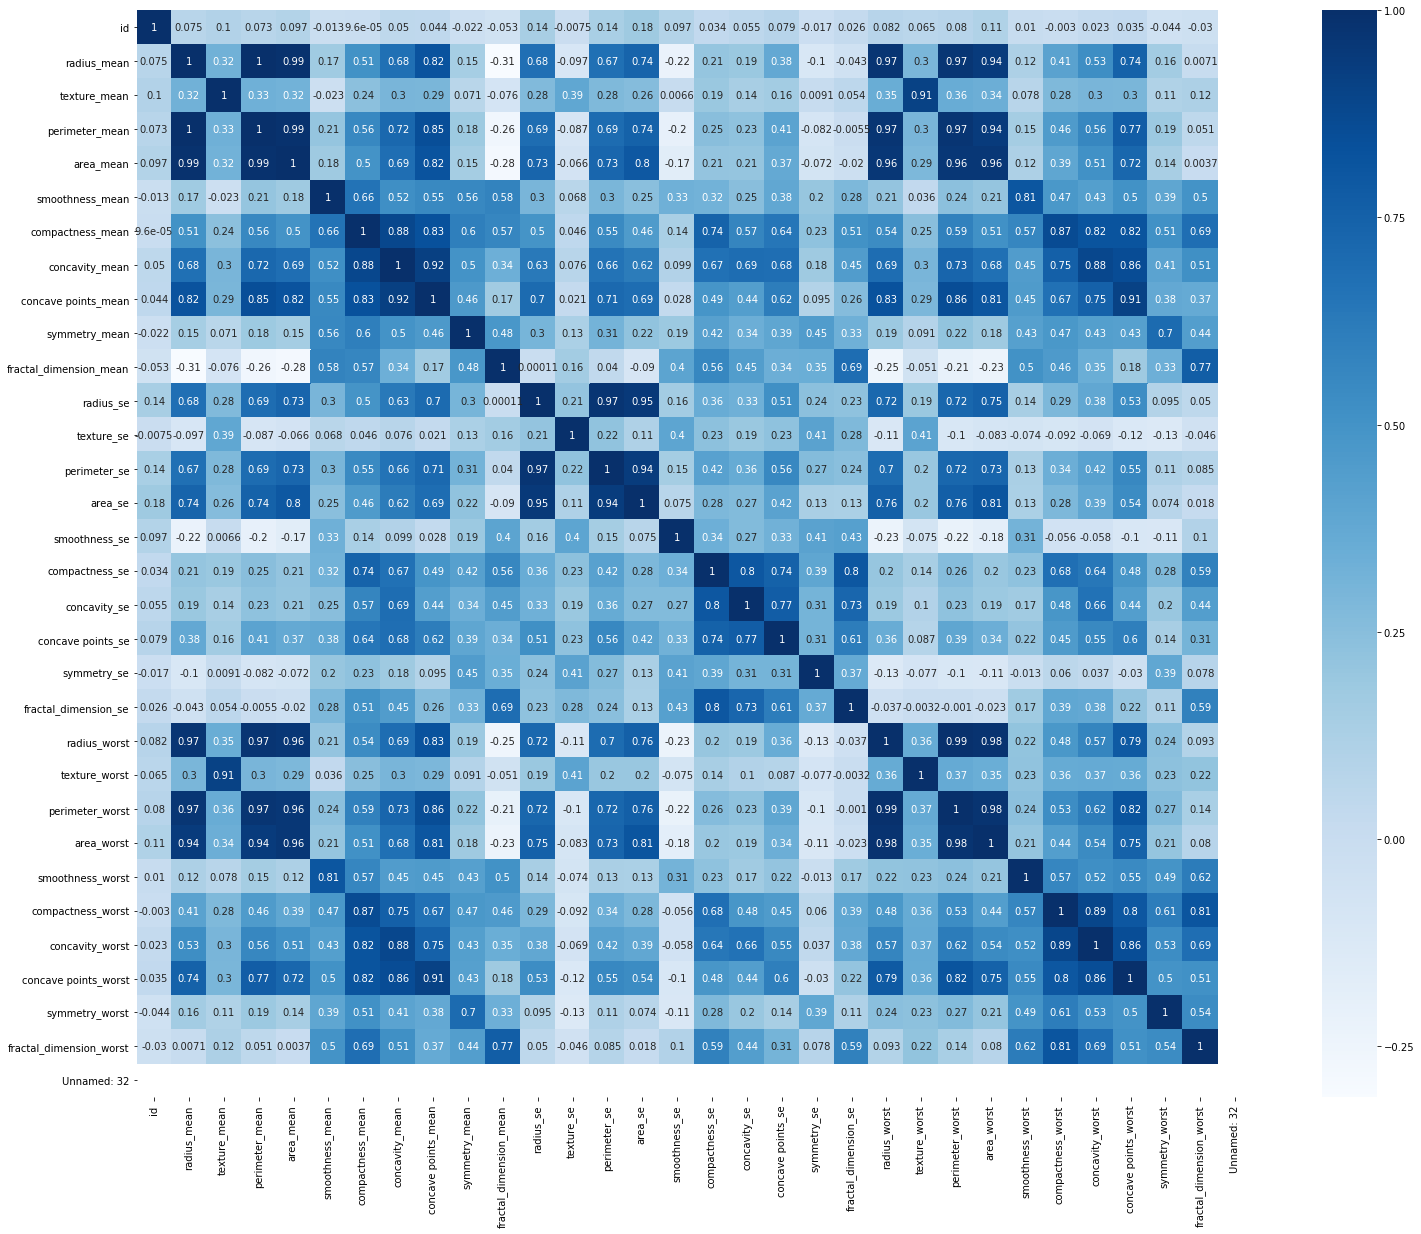

In [17]:
# Correlation Map for breast cancer data
plt.figure(figsize = (25, 20))
sns.heatmap(cancer.corr(method = 'pearson'), annot = True, cmap = 'Blues')

# Feature Selection

In [5]:
# dropping unnecessary features
drop = ['radius_mean', 'perimeter_mean', 'compactness_mean', 'concave points_mean','radius_se',\
        'perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst',\
        'compactness_se','concave points_se','texture_worst','area_worst', 'Unnamed: 32']

cancer.drop(drop, axis = 1, inplace = True)
cancer.head()

,id,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,842517,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,84300903,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,84348301,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,84358402,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


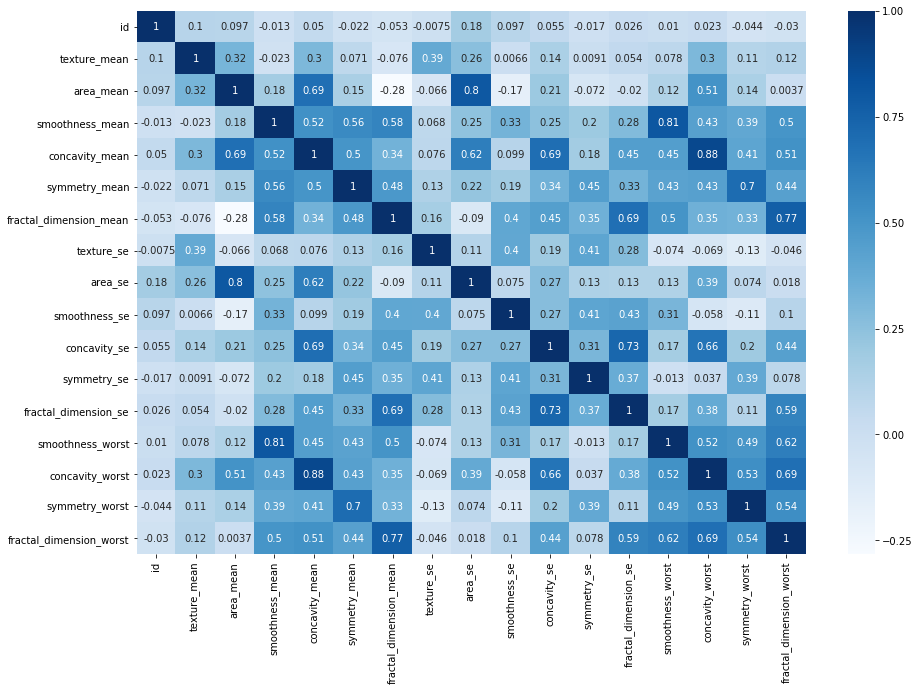

In [5]:
plt.figure(figsize = (15, 10))
sns.heatmap(cancer.corr(method = 'pearson'), annot = True, cmap = 'Blues')

# Split features and target variable

In [6]:
target = cancer.diagnosis

In [7]:
features = cancer.drop('diagnosis', axis = 1)

In [8]:
features.set_index('id', inplace = True)
features.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,
842302,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
842517,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
84300903,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
84348301,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
84358402,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 16 columns):
texture_mean               569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
concavity_mean             569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
texture_se                 569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
concavity_se               569 non-null float64
symmetry_se                569 non-null float64
fractal_dimension_se       569 non-null float64
smoothness_worst           569 non-null float64
concavity_worst            569 non-null float64
symmetry_worst             569 non-null float64
fractal_dimension_worst    569 non-null float64
dtypes: float64(16)
memory usage: 75.6 KB


In [10]:
target.head(10)

0    M
1    M
2    M
3    M
4    M
5    M
6    M
7    M
8    M
9    M
Name: diagnosis, dtype: object

# Feature Scaling and Dimensionality Reduction

In [10]:
# Normalize the features
# Normalized_X = (X - mean)/(Max - Min)
features = (features - features.mean())/(features.max() - features.min())

In [11]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(features)

final_data = pca.transform(features)
final_data = pd.DataFrame(final_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', \
                                                 'Dimension 4', 'Dimension 5', 'Dimension 6'])
final_data.head()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.872302,-0.124382,-0.204857,0.289949,0.224695,0.070051
1,-0.053776,0.272582,-0.119945,0.069481,0.048891,0.046395
2,0.375320,0.224618,-0.071562,0.139086,-0.044810,0.010114
3,1.287439,-0.781312,-0.037638,0.214652,-0.056746,-0.340815
4,0.198936,0.239121,-0.074463,0.072988,0.123340,0.328129


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold # import kfold

clf = DecisionTreeClassifier() # build algorithm function object
kf = KFold(n_splits=5) # build the kfold function object

for train_index, test_index in kf.split(final_data):

    # splitting the test and train data using the kfolds
    X_train, X_test = final_data.iloc[train_index], final_data.iloc[test_index] 
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    #fit the model and predit 
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    score = accuracy_score(y_test, prediction)
    f1 = f1_score(y_test, prediction, average = 'weighted')
    
    print('Accuracy: ', score)
    print('F1 Score: ', f1)

Accuracy:  0.868421052631579
F1 Score:  0.869613057032826
Accuracy:  0.9035087719298246
F1 Score:  0.9027017963067764
Accuracy:  0.9385964912280702
F1 Score:  0.9387666697608217
Accuracy:  0.9649122807017544
F1 Score:  0.9652882205513783
Accuracy:  0.7964601769911505
F1 Score:  0.8117680336772847
